In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import pickle
from textblob import TextBlob

# Data Preprocessing

## Data Exploration

In [6]:
df = pd.read_csv('reviews.csv')

C:\Users\shahd\AppData\Local\Temp\ipykernel_15872\2980804807.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reviews.csv')


In [7]:
df.head()

,review_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,author_id
0,1,5,1.0,1.0,2,0,2,2/1/2023,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,P504322,1741593524
1,2,1,0.0,NaN,0,0,0,3/21/2023,I bought this lip mask after reading the revie...,Disappointed,P420652,31423088263
2,3,5,1.0,NaN,0,0,0,3/21/2023,My review title says it all! I get so excited ...,New Favorite Routine,P420652,5061282401
3,4,5,1.0,NaN,0,0,0,3/20/2023,I’ve always loved this formula for a long time...,Can't go wrong with any of them,P420652,6083038851
4,5,5,1.0,NaN,0,0,0,3/20/2023,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,47056667835


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   review_id                 602130 non-null  int64  
 1   rating                    602130 non-null  int64  
 2   is_recommended            484644 non-null  float64
 3   helpfulness               270298 non-null  float64
 4   total_feedback_count      602130 non-null  int64  
 5   total_neg_feedback_count  602130 non-null  int64  
 6   total_pos_feedback_count  602130 non-null  int64  
 7   submission_time           602130 non-null  object 
 8   review_text               601131 non-null  object 
 9   review_title              435119 non-null  object 
 10  product_id                602130 non-null  object 
 11  author_id                 602130 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 55.1+ MB


## Feature Selection

In [9]:
df.drop(columns=['helpfulness', 'total_feedback_count', 'submission_time', 'product_id', 'author_id', 'total_pos_feedback_count', 'total_neg_feedback_count'], axis=1, inplace=True)

## Handling Missing Values

In [11]:
print('Percentage of Missing Values')
df.isnull().sum()/len(df) * 100

Percentage of Missing Values


review_id          0.000000
rating             0.000000
is_recommended    19.511733
review_text        0.165911
review_title      27.736701
dtype: float64

### review_text

In [12]:
df.dropna(subset=['review_text'], inplace=True)

In [13]:
len(df)

601131

### review_title

In [14]:
df.fillna({'review_title': 'Untitled'}, inplace=True)

### is_recommended

In [18]:
df['is_recommended'].value_counts()

is_recommended
1.0    405235
0.0     78410
Name: count, dtype: int64

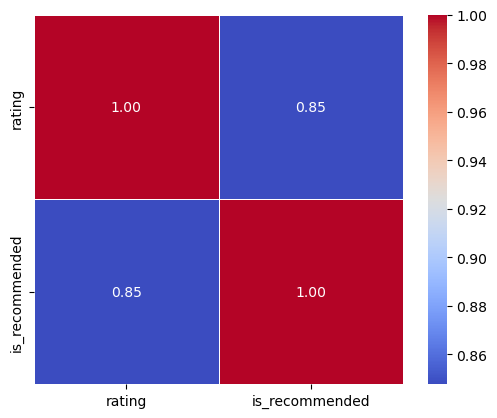

In [20]:
corr = df[['rating', 'is_recommended']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.show()

There's a **high correlation** between rating columns and is_recommended column; thus, a simple **Logistic Regression model** will be used to predict the missing values in is_recommended column based on rating.

In [21]:
complete_df = df[df['is_recommended'].notnull()]
missing_df = df[df['is_recommended'].isnull()]

In [22]:
x = complete_df[['rating']]
y = complete_df['is_recommended']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

print(f'Train Accuracy: {model.score(x_train, y_train)}')
print(f'Test Accuracy: {model.score(x_test, y_test)}')

Train Accuracy: 0.9634158318601453
Test Accuracy: 0.9631134406434472


The accuracy is high, so the model will be reliable in predicting the missing values.

In [24]:
predicted_values = model.predict(missing_df[['rating']])
df.loc[df['is_recommended'].isnull(), 'is_recommended'] = predicted_values

In [25]:
df.isnull().sum()/len(df) * 100

review_id         0.0
rating            0.0
is_recommended    0.0
review_text       0.0
review_title      0.0
dtype: float64

## Visualization

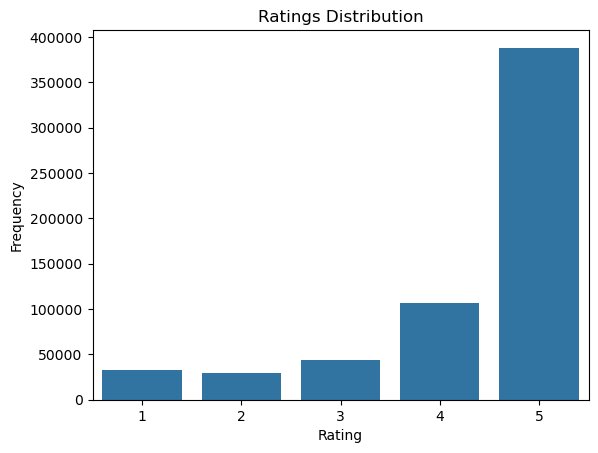

In [26]:
sns.countplot(x='rating', data=df)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

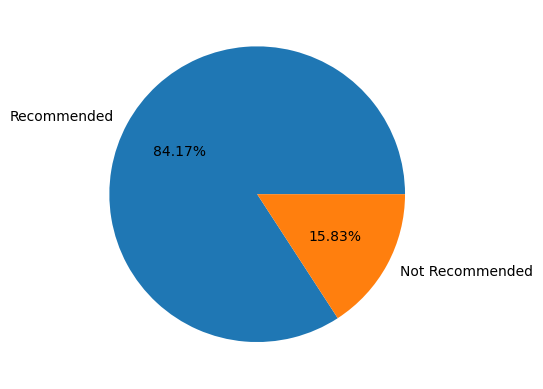

In [27]:
counts = df['is_recommended'].value_counts()
labels = ['Recommended', 'Not Recommended']

plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.show()

## TextBlob

In [28]:
def extract_sentiment(text):
    return TextBlob(text).sentiment.polarity, TextBlob(text).sentiment.subjectivity

In [29]:
df[['text_sentiment', 'text_subjectivity']] = df['review_text'].apply(extract_sentiment).apply(pd.Series)
df[['title_sentiment', 'title_subjectivity']] = df['review_title'].apply(extract_sentiment).apply(pd.Series)

In [30]:
df2 = df.copy()
df2.head()

,review_id,rating,is_recommended,review_text,review_title,text_sentiment,text_subjectivity,title_sentiment,title_subjectivity
0,1,5,1.0,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,0.283333,0.557143,0.000000,0.000000
1,2,1,0.0,I bought this lip mask after reading the revie...,Disappointed,0.000000,0.750000,-0.750000,0.750000
2,3,5,1.0,My review title says it all! I get so excited ...,New Favorite Routine,0.102778,0.450000,0.318182,0.727273
3,4,5,1.0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,0.381250,0.512500,-0.500000,0.900000
4,5,5,1.0,"If you have dry cracked lips, this is a must h...",A must have !!!,-0.127381,0.414286,0.000000,0.000000


# Modeling

## KMeans

In [31]:
features = df2[['rating', 'is_recommended', 'text_sentiment', 'text_subjectivity', 'title_sentiment', 'title_subjectivity']]

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(features)
df2['cluster'] = kmeans.labels_

In [33]:
df2['cluster'].value_counts()

cluster
2    282432
0    212671
1    106028
Name: count, dtype: int64

In [43]:
df2.drop(columns=['review_text', 'review_title'], axis=1, inplace=True)

In [44]:
df2.to_csv('ResultsTestBlob.csv', index=False)

## Label Clusters

In [45]:
clusterred_df = pd.read_csv('ResultsTestBlob.csv')

In [46]:
labels = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}

In [47]:
clusterred_df['cluster_label'] = clusterred_df['cluster'].replace(labels)

In [48]:
clusterred_df.head()

,review_id,rating,is_recommended,text_sentiment,text_subjectivity,title_sentiment,title_subjectivity,cluster,cluster_label
0,1,5,1.0,0.283333,0.557143,0.000000,0.000000,2,Neutral
1,2,1,0.0,0.000000,0.750000,-0.750000,0.750000,1,Negative
2,3,5,1.0,0.102778,0.450000,0.318182,0.727273,0,Positive
3,4,5,1.0,0.381250,0.512500,-0.500000,0.900000,2,Neutral
4,5,5,1.0,-0.127381,0.414286,0.000000,0.000000,2,Neutral


In [57]:
clusterred_df['cluster_label'].value_counts()

cluster_label
Neutral     282432
Positive    212671
Negative    106028
Name: count, dtype: int64

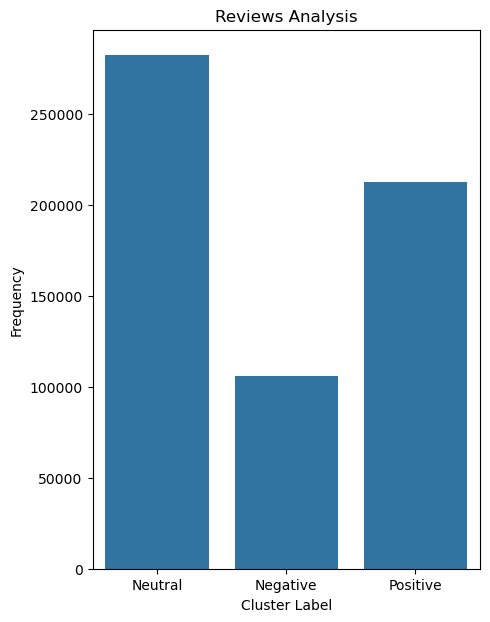

In [55]:
plt.figure(figsize=(5, 7))
sns.countplot(x='cluster_label', data=clusterred_df)
plt.title('Reviews Analysis')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

In [50]:
clusterred_df.to_csv('labeledClusters.csv', index=False)